In [ ]:
import numpy as np
import pandas as pd
from sklearn import svm
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 

In [ ]:
data=pd.read_table('/content/fruit_data_with_colors.txt')


In [ ]:
df=data.copy()
df.head(30)

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79
5,2,mandarin,mandarin,80,5.8,4.3,0.77
6,2,mandarin,mandarin,80,5.9,4.3,0.81
7,2,mandarin,mandarin,76,5.8,4.0,0.81
8,1,apple,braeburn,178,7.1,7.8,0.92
9,1,apple,braeburn,172,7.4,7.0,0.89


In [ ]:
X1=df['color_score']
X2=df['height']
X3=df['mass'].unique
X4=df['width'].unique

Y1=df['fruit_label'].unique
Y2=df['fruit_name'].unique
Y3=df['fruit_subtype'].unique

Text(0, 0.5, 'height')

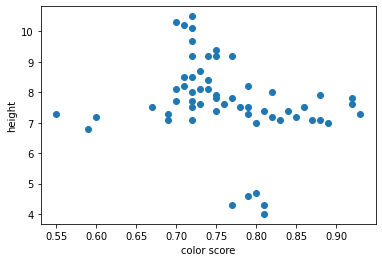

In [ ]:
plt.scatter(X1,X2)
plt.xlabel('color score')
plt.ylabel('height')




In [ ]:
look_up_fruit_name=dict(zip(df.fruit_label.unique(),df.fruit_name.unique()))
look_up_fruit_name

{1: 'apple', 2: 'mandarin', 3: 'orange', 4: 'lemon'}

In [ ]:
feature_names = ['mass', 'width', 'height', 'color_score']
X = df[feature_names]
y = df['fruit_label']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0,test_size=0.2)

In [ ]:
from matplotlib import cm
cmap = cm.get_cmap('gnuplot')


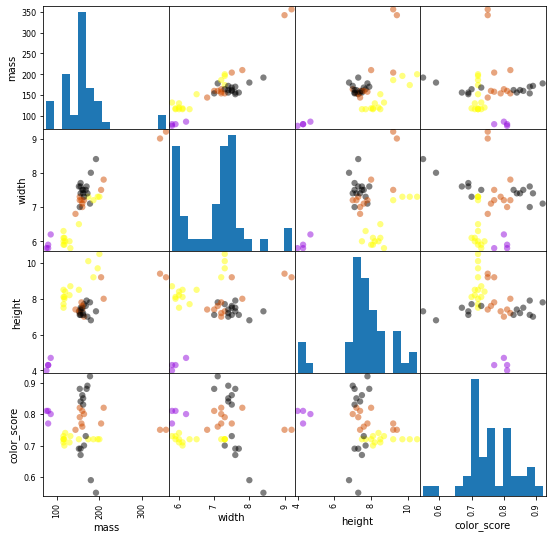

In [ ]:
scatter = pd.plotting.scatter_matrix(X_train, c = y_train, marker = 'o', s=40, hist_kwds={'bins':15}, figsize=(9,9), cmap = cmap)


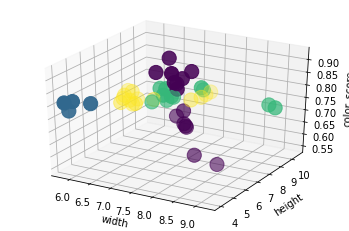

In [ ]:
#Pour visualizer en data en 3 dimension 
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(X_train['width'], X_train['height'], X_train['color_score'], c = y_train, marker = 'o', s=200)
ax.set_xlabel('width')
ax.set_ylabel('height')
ax.set_zlabel('color_score')
plt.show()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
Knn=KNeighborsClassifier(n_neighbors=5)
train_feature=knn.fit(X_train,y_train)
test_predicted=knn.predict(X_test)
rapport=classification_report(y_test,test_predicted)
rapport=rapport.split('\n')
rapport

['              precision    recall  f1-score   support',
 '',
 '           1       0.60      0.75      0.67         4',
 '           2       1.00      1.00      1.00         1',
 '           3       0.67      0.40      0.50         5',
 '           4       0.33      0.50      0.40         2',
 '',
 '    accuracy                           0.58        12',
 '   macro avg       0.65      0.66      0.64        12',
 'weighted avg       0.62      0.58      0.58        12',
 '']

In [ ]:
from sklearn.tree import DecisionTreeClassifier
decision_tree=DecisionTreeClassifier()
train_feature1=decision_tree.fit(X_train,y_train)
test_predicted1=decision_tree.predict(X_test)
rapport=classification_report(y_test,test_predicted1)
rapport=rapport.split('\n')
rapport


['              precision    recall  f1-score   support',
 '',
 '           1       0.80      1.00      0.89         4',
 '           2       1.00      1.00      1.00         1',
 '           3       1.00      0.80      0.89         5',
 '           4       1.00      1.00      1.00         2',
 '',
 '    accuracy                           0.92        12',
 '   macro avg       0.95      0.95      0.94        12',
 'weighted avg       0.93      0.92      0.92        12',
 '']

0.5333333333333333

In [ ]:
from sklearn.linear_model import LogisticRegression
logistic=LogisticRegression()
train_feature=logistic.fit(X_train,y_train)
test_feature=logistic.predict(X_test)
rapport=classification_report(y_test,test_predicted1)
rapport=rapport.split('\n')
rapport

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


['              precision    recall  f1-score   support',
 '',
 '           1       0.80      1.00      0.89         4',
 '           2       1.00      1.00      1.00         1',
 '           3       1.00      0.80      0.89         5',
 '           4       1.00      1.00      1.00         2',
 '',
 '    accuracy                           0.92        12',
 '   macro avg       0.95      0.95      0.94        12',
 'weighted avg       0.93      0.92      0.92        12',
 '']